# Aprendizaje No Supervisado - Clúster jerárquico

En minería de datos, el agrupamiento jerárquico es un método de análisis de grupos puntuales, el cual busca construir una jerarquía de grupos. Estrategias para agrupamiento jerárquico generalmente caen en dos tipos:

**Aglomerativas:** Este es un acercamiento ascendente: cada observación comienza en su propio grupo, y los pares de grupos son mezclados mientras uno sube en la jerarquía.

**Divisivas:** Este es un acercamiento descendente: todas las observaciones comienzan en un grupo, y se realizan divisiones mientras uno baja en la jerarquía.

En general, las mezclas y divisiones son determinadas con un Algoritmo voraz. Los resultados del agrupamiento jerárquico son usualmente presentados en un dendrograma.

**Métricas de distancia**

![Métricas](metricas.png)

**Criterio de enlace**

![Criterio](criterio.png)

In [1]:
# Importar módulos y funciones necesarias para el dendograma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar los módulos y funciones de los cluster jerárquicos
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

%matplotlib inline

## Cargar los datos

In [2]:
url = 'https://raw.githubusercontent.com/JASDataCTG/Diplomado-ML/main/Modulo%205/Datasets/estudiantes.csv'
# Cargar los datos de la columna estudiante como índice del dataframe
df = pd.read_csv(url, index_col=0)

In [3]:
df.head()

,Matematicas,Ciencias,Espanol,Historia,Deportes
Estudiante,,,,,
Lucia,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Ines,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andres,6.0,6.0,7.8,8.9,7.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Lucia to Maria
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Matematicas  10 non-null     float64
 1   Ciencias     10 non-null     float64
 2   Espanol      10 non-null     float64
 3   Historia     10 non-null     float64
 4   Deportes     10 non-null     float64
dtypes: float64(5)
memory usage: 480.0+ bytes


In [5]:
# Cargar los datos de las notas en un array de tipo matriz
notas = df.iloc[:, [0, 1, 2, 3, 4]].values
notas

array([[7. , 6.5, 9.2, 8.6, 8. ],
       [7.5, 9.4, 7.3, 7. , 7. ],
       [7.6, 9.2, 8. , 8. , 7.5],
       [5. , 6.5, 6.5, 7. , 9. ],
       [6. , 6. , 7.8, 8.9, 7.3],
       [7.8, 9.6, 7.7, 8. , 6.5],
       [6.3, 6.4, 8.2, 9. , 7.2],
       [7.9, 9.7, 7.5, 8. , 6. ],
       [6. , 6. , 6.5, 5.5, 8.7],
       [6.8, 7.2, 8.7, 9. , 7. ]])

## Crear dendograma

In [6]:
# Con la matriz de notas se crean los cluster jerárquicos
clus_je = linkage(
    notas,
    'ward')  # ward indica que se va a realizar la agrupación por clústers

Para el calculo de los clusteres se utiliza la minimización de varianzas de Ward:

$d(u,v) = \sqrt{\frac{|v|+|s|}
                           {T}d(v,s)^2
                    + \frac{|v|+|t|}
                           {T}d(v,t)^2
                    - \frac{|v|}
                           {T}d(s,t)^2}$

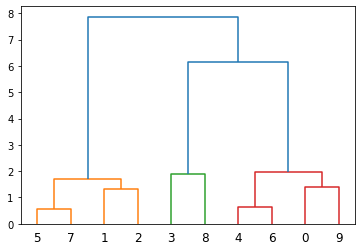

In [7]:
# Graficar el dendograma a partir de los clusteres creados, en el eje de las 'x' se
# muestra las instancias del conjunto de datos que terminan agrupadas y el eje
# de las 'y' representa la altura del dendograma donde se hacen los cortes de agrupación
dendrogram = sch.dendrogram(clus_je)

In [8]:
# Forma los clusteres de acuerdo al límite de altura t y el criterio elegido
cluster = fcluster(
    clus_je, t=2,
    criterion='distance')  # t es la altura del corte del dendograma

In [9]:
cluster

array([3, 1, 1, 2, 3, 1, 3, 1, 2, 3], dtype=int32)

La salida anterior nos informa a que cluster pertenece cada instancia:

* Al cluster 1 pertenecen las instancias con índice 1, 2, 5, 7
* Al cluster 2 pertenecen las instancias con índice 3 y 8
* Al cluster 3 pertenecen las instancias con índice 0, 4, 6 y 9

Esto cuando la altura t que determina los clusteres sea igual a 2, pruebe el modelo con otros valores y comente con su docente los resultados.

In [10]:
# Anexar los clusteres asignados al dataframe original en la columna 'Cluster'
# que puede ser asignado como etiqueta de clase
df['Cluster'] = cluster

In [11]:
df

,Matematicas,Ciencias,Espanol,Historia,Deportes,Cluster
Estudiante,,,,,,
Lucia,7.0,6.5,9.2,8.6,8.0,3
Pedro,7.5,9.4,7.3,7.0,7.0,1
Ines,7.6,9.2,8.0,8.0,7.5,1
Luis,5.0,6.5,6.5,7.0,9.0,2
Andres,6.0,6.0,7.8,8.9,7.3,3
Ana,7.8,9.6,7.7,8.0,6.5,1
Carlos,6.3,6.4,8.2,9.0,7.2,3
Jose,7.9,9.7,7.5,8.0,6.0,1
Sonia,6.0,6.0,6.5,5.5,8.7,2
